<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Νικήτας Τσίννας, el18187</h3>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [198]:
%matplotlib inline
!pip install pandas
!pip install pyamg
import matplotlib
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
from networkx.algorithms import community as cmt
import time
import warnings
from datetime import datetime 
warnings.simplefilter("ignore", UserWarning)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [134]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n, d, p, seed=seedno)
RGER = nx.gnm_random_graph(n, M, seed=seedno)
RGG = nx.random_geometric_graph(n, R, seed=seedno) 
SF = nx.barabasi_albert_graph(n, d, seed=seedno) 
SW = nx.watts_strogatz_graph(n, k, p, seed=seedno)  

print('Checking if graphs are connected:\n')
print('REG \tconnected: ' + str(nx.is_connected(REG)))
print('RGER \tconnected: ' + str(nx.is_connected(RGER)))
print('RGG \tconnected: ' + str(nx.is_connected(RGG)))
print('SF \tconnected: ' + str(nx.is_connected(SF)))
print('SW \tconnected: ' + str(nx.is_connected(SW)))

Checking if graphs are connected:

REG 	connected: True
RGER 	connected: True
RGG 	connected: True
SF 	connected: True
SW 	connected: True


Παρατηρούμε πως όλα τα δίκτυα που πρόκειται να εξετάσουμε έιναι συνδεδεμένα και μη κατευθυνόμενα. Παρακάτω παρουσιάζονται σε spring layout τα πραγματικά δίκτυα.

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

Graph with 115 nodes and 613 edges


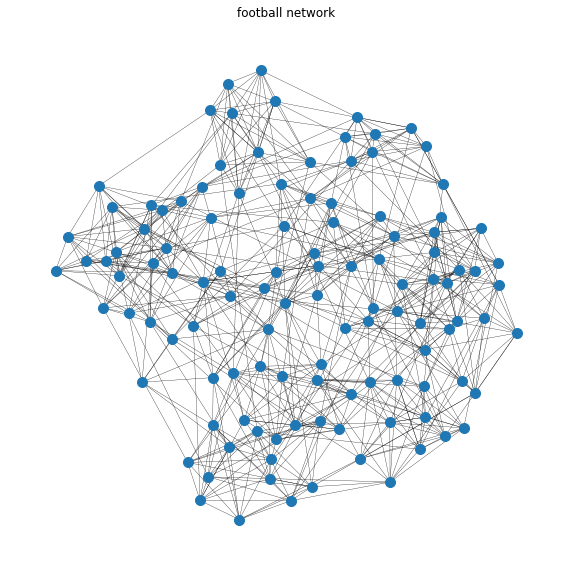

In [135]:
#football network
football=nx.read_gml(r"football.gml")
print(football)
plt.figure(figsize=(10,10))
plt.title('football network')
nx.draw(football, node_size=100, width=0.3)

Graph with 119 nodes and 396 edges


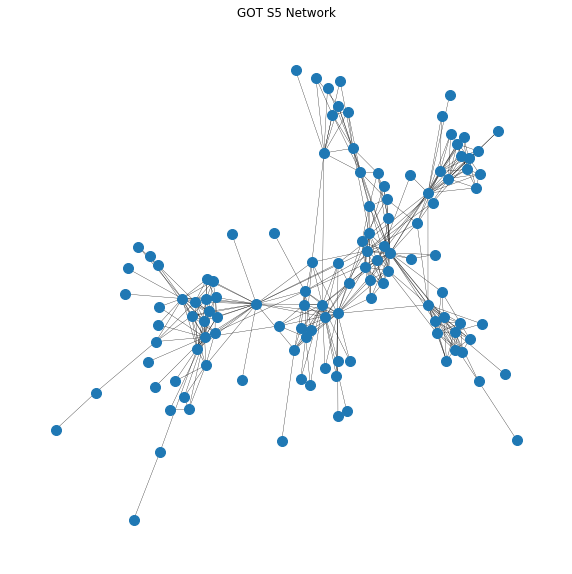

In [136]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
        
print(got)
plt.figure(figsize=(10,10))
plt.title('GOT S5 Network')
nx.draw(got, node_size=100, width=0.3)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

Initian Graph:
Graph with 1005 nodes and 16706 edges

Graph Before:
Graph with 986 nodes and 16687 edges

Graph after removal of self-loops:
Graph with 986 nodes and 16064 edges


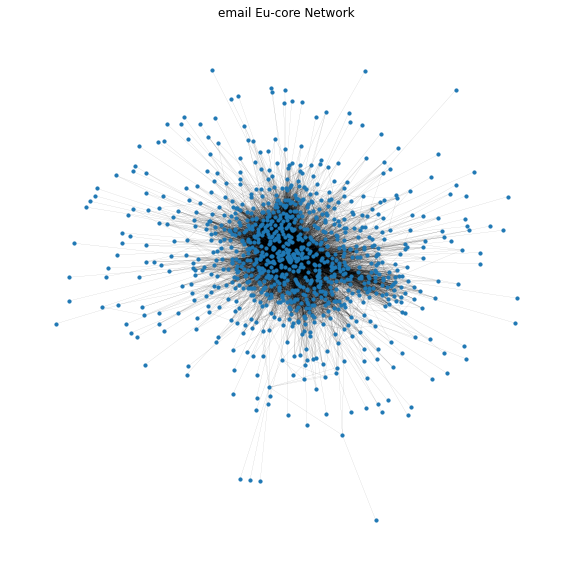

In [137]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())
print('Initian Graph:\n' + str(eu))
print()
#find the bigger connected component of graph
components_sorted = sorted(nx.connected_components(eu), key=len, reverse=True)
eu1 = nx.Graph(nx.subgraph(eu, components_sorted[0]))
#remove self-loops from connected graph
print('Graph Before:\n' + str(eu1))
selfloops = nx.selfloop_edges(eu1)
eu1.remove_edges_from(selfloops)
print()
print('Graph after removal of self-loops:\n' + str(eu1))

plt.figure(figsize=(10,10))
plt.title('email Eu-core Network')
nx.draw_spring(eu1, node_size=10, width=0.05, edge_color='black')

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [138]:
def find_degree(G, name, multiple=0, x=0, y=0, axis=None):
    degrees = [d for n, d in G.degree()]
    if(multiple):
        axis[x][y].set_title(name + ": Node Degree Distribution")
        axis[x][y].hist(degrees)
        axis[x][y].set_xlabel('Node Degree')
        axis[x][y].set_ylabel('# Nodes')
        
    else:
        plt.title(name + ": Node Degree Distribution")
        plt.hist(degrees)
        plt.xlabel('Node Degree')
        plt.ylabel('# Nodes')
        plt.show()
        
    summ = 0
    for degree in degrees:
        summ += degree
    mean = summ/len(G.nodes())
    #print(name)
    #print("Average Degree: " + str(mean))
    var = 0
    var = np.var(list(degrees))
    #print("Variance Degree: " + str(var))
    return (mean, var)

def report(title, function, networks, labels, x, y, figuresize):
    fig, axis = plt.subplots(x,y,figsize=figuresize)
    fig.tight_layout(pad=5)
    res = []
    counter = 0
    i = 0
    j = 0
    mean = []
    var = []
    for net in networks:
        res = function(net, labels[counter], 1, i, j, axis)
        counter += 1
        mean.append(res[0])
        var.append(res[1])
        j+=1
        if(j == y):
            j=0
            i+=1
    data = {"Network":labels,
           "Mean "+title:mean,
           "Variance "+title:var}
    table = pd.DataFrame(data)
    print(table)
    return

  Network  Mean degree  Variance degree
0     REG         4.00           0.8000
1    RGER         7.50           8.1500
2     RGG        11.25          13.6625
3      SF         7.60          33.3900
4      SW         4.00           0.8000


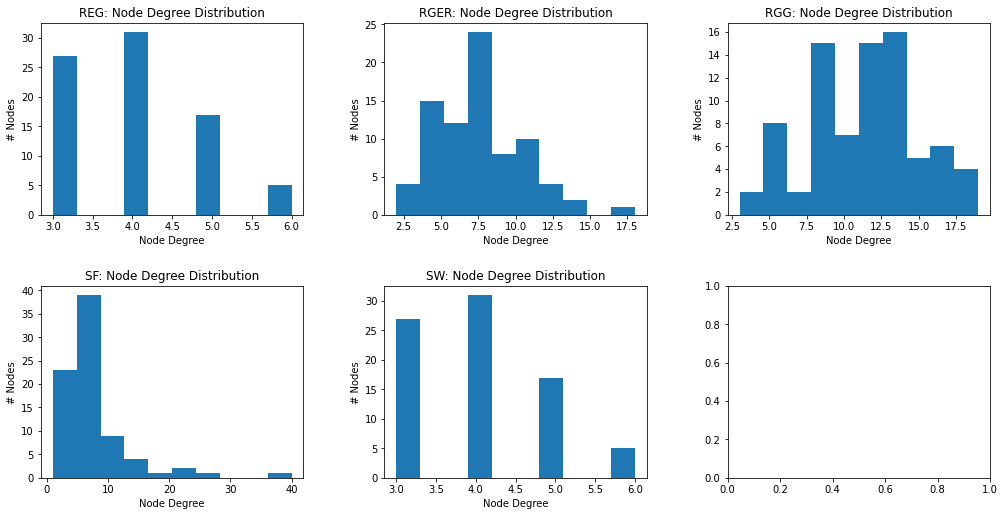

In [139]:
report('degree', find_degree, [REG, RGER, RGG, SF, SW], ['REG', 'RGER', 'RGG', 'SF', 'SW'], 2,3, (15,8))

         Network  Mean degree  Variance degree
0       Football    10.660870         0.780643
1         GOT S5     6.655462        31.049361
2  Email Eu-core    32.584178      1370.887944


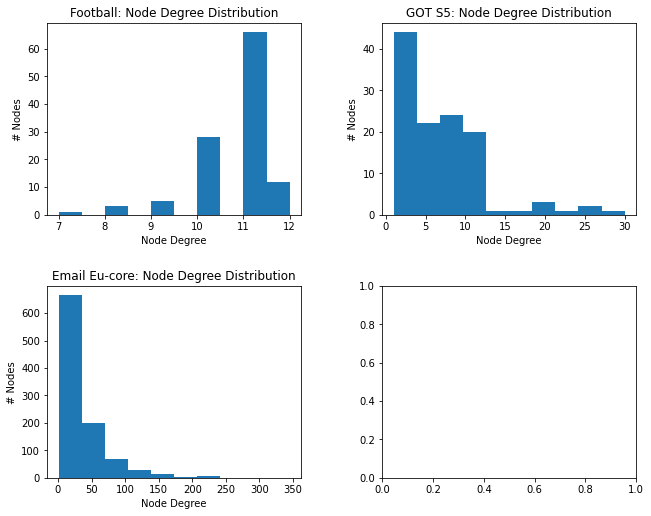

In [140]:
report('degree', find_degree, [football, got, eu1], ['Football', 'GOT S5', 'Email Eu-core'], 2, 2, (10, 8))

#### Μελέτη Βαθμού Κόμβων Πραγματικών Δικτύων

- Για το δίκτυο football παρατηρούμε πως η μέση τιμή είναι σχετικά υψυλή και πολύ κοντά σε αυτή του σύνθετου δικτύου RGG. Ωστόσο η διασπορά είναι σημαντικά μικρότερη από αυτή του RGG και επίσης η καμπύλη κατανομής δεν φαίνεται να τείνει προς την uniform, όπως γίνεται στο RGG.  
- To δίκτυο του GOT S5 φαίνεται να έχει πολύ κοντινές τιμές mean και variance σε αυτές του συνθετικού δικτύου Scale-Free. Επίσης η καμπύλη κατανομής φαίνεται να είναι τύπου power-law όπως συμβαίνει και στο συνθετικό δίκτυο SF
- Το δίκτυο Email EU φαίνεται να τείνει και αυτό προς την τοπολογία του συνθετικού δικτύου SF για τους ίδιους λόγους παραπάνω. 

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [141]:
def cc(G, name, multiple=0, x=0, y=0, axis=None):
    clust_coeffs = nx.clustering(G)
    values = list(clust_coeffs.values())
    
    if(multiple):
        axis[x][y].set_title(name + ': Clustering Coefficient Distribution')
        axis[x][y].hist(values)
        axis[x][y].set_xlabel('Clustering Coefficient Value')
        axis[x][y].set_ylabel('# Nodes')
    else:
        plt.hist(values)
        plt.title(name + ': Clustering Coefficient Distribution')
        plt.xlabel('Clustering Coefficient Value')
        plt.ylabel('# Nodes')
        plt.show()
   
    mean = np.mean(values)
    var = np.var(values)
    #print('Average Clustering Coefficient: ' + str(mean))
    #print('Clustering Coefficient Variance: ' + str(var))
    return (mean, var)

  Network   Mean cc  Variance cc
0     REG  0.167083     0.028069
1    RGER  0.084978     0.004289
2     RGG  0.682579     0.020650
3      SF  0.229228     0.028929
4      SW  0.167083     0.028069


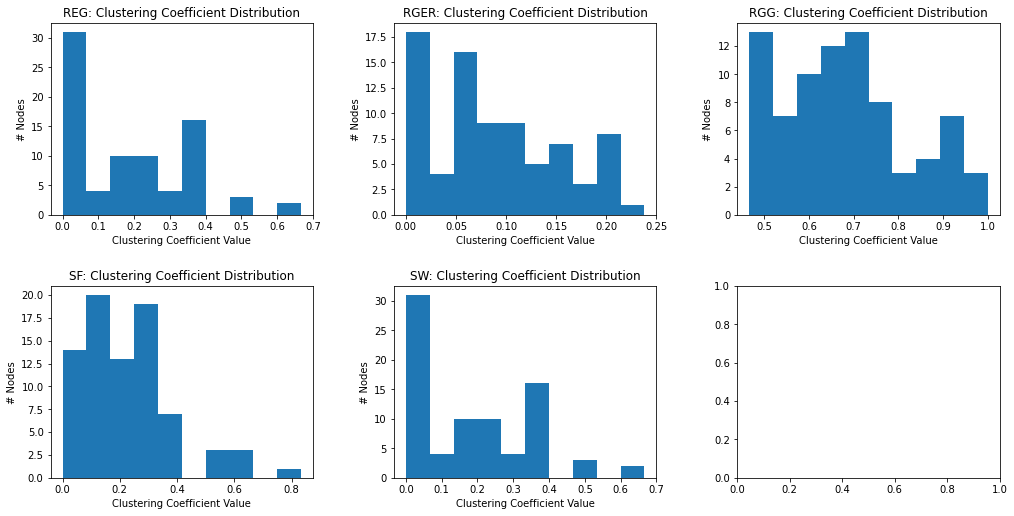

In [142]:
report('cc', cc, [REG, RGER, RGG, SF, SW], ['REG', 'RGER', 'RGG', 'SF', 'SW'], 2,3, (15,8))

         Network   Mean cc  Variance cc
0       Football  0.403216     0.010767
1         GOT S5  0.574404     0.126111
2  Email Eu-core  0.407050     0.061372


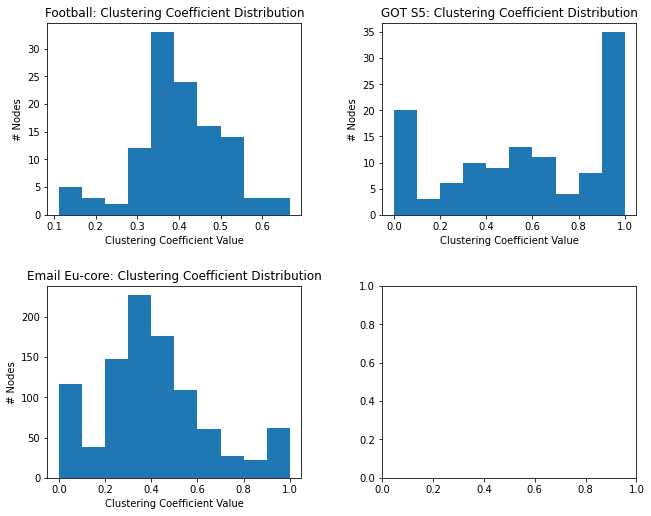

In [143]:
report('cc', cc, [football, got, eu1], ['Football', 'GOT S5', 'Email Eu-core'], 2, 2, (10, 8))

#### Μελέτη Συντελεστή Ομαδοποίησης Πραγματικών Δικτύων

- Για το δίκτυο football παρατηρούμε πως η μέση τιμή είναι σχετικά υψυλή και πολύ κοντά σε αυτή του σύνθετου δικτύου RGG. Επίσης η διασπορά έχει λογική και παρόμοια τιμή με αυτή του RGG.
- Για το δίκτυο του GOT έχουμε κατανομή που αυτή την φορά δεν μοιάζει με αυτή του SF. Παρατηρούμε πως οι περισσότεροι κόμβοι του δικτύου έχουν μέγιστο συντελεστή ομαδοποίησης. Επίσης, έχει τις μεγαλύτερες τιμές mean και variance μεταξύ των πραγματικών δικτύων. 
- Για το δίκτυο Email EU παρατηρούμε πως η κατανομή καθώς και οι τιμές μοιάζουν με του δικτύου RGG. 

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

In [144]:
def find_closeness(G, name, multiple=0, x=0, y=0, axis=None):
    closeness_centrality = nx.closeness_centrality(G)
    values = list(closeness_centrality.values())
    if(multiple):
        axis[x][y].set_title(name + ': Closeness Centrality Distribution')
        axis[x][y].hist(values)
        axis[x][y].set_xlabel('Closeness Centrality Value')
        axis[x][y].set_ylabel('# Nodes')
    else:
        plt.figure()
        plt.title(name + ": Closeness Centrality Distribution")
        plt.hist(values, width=0.02)
        plt.xlabel('Closeness Centrality Value')
        plt.ylabel('# Nodes')
    mean = np.mean(values)
    var = np.var(values)
#     print(name)
#     print("Average Closeness Centrality: " + str(mean))
#     print("Variance of Closeness Centrality: " + str(var))
#     print('\n')
    return(mean, var)

  Network  Mean closeness centrality  Variance closeness centrality
0     REG                   0.269143                       0.000320
1    RGER                   0.424230                       0.001367
2     RGG                   0.320088                       0.002353
3      SF                   0.446445                       0.002744
4      SW                   0.269143                       0.000320


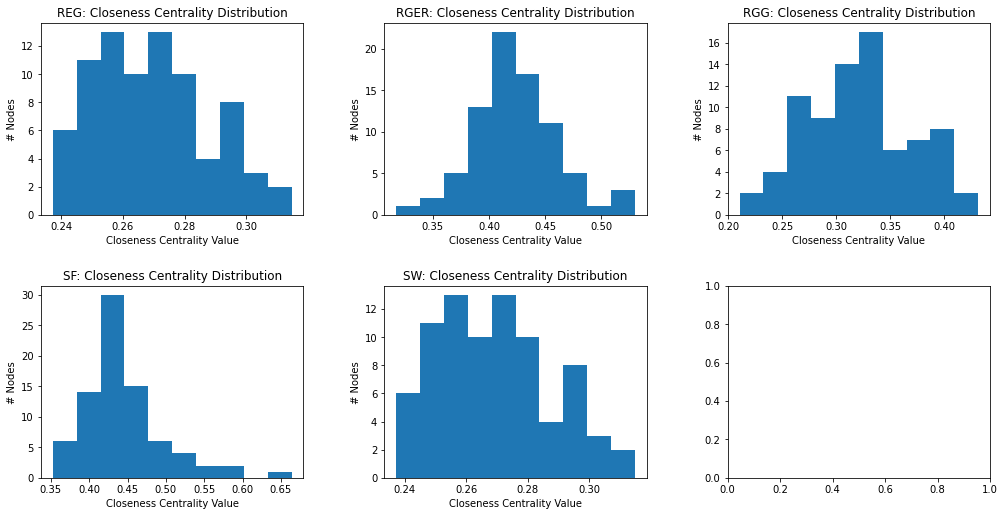

In [145]:
report('closeness centrality', find_closeness, [REG, RGER, RGG, SF, SW], ['REG', 'RGER', 'RGG', 'SF', 'SW'], 2,3, (15,8))

         Network  Mean closeness centrality  Variance closeness centrality
0       Football                   0.399319                       0.000246
1         GOT S5                   0.319052                       0.002653
2  Email Eu-core                   0.394464                       0.002988


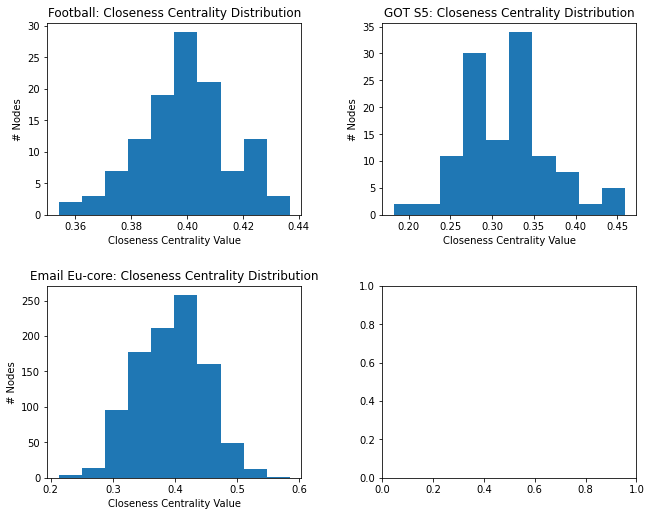

In [146]:
report('closeness centrality', find_closeness, [football, got, eu1], ['Football', 'GOT S5', 'Email Eu-core'], 2, 2, (10, 8))

#### Μελέτη Κεντρικότητας Εγγυήτητας Πραγματικών Δικτύων

- Για το πραγματικό δίκτυο football έχει παρόμοια κατανομή με αυτή του RGER και RGG. Ωστόσο η μέση τιμή και η διασπορά τείνουν περισσότερο σε αυτές του RGER.
- Για το δίκτυο του GOT έχουμε κατανομή που μοιάζει με αυτή του RGG. Ωστόσο οι τιμές, εκτός από το RGG, μοιάζουν και με αυτές του SF συνθετικού δικτύου.
- Για το δίκτυο Email EU έχουμε κατανομή και τιμές που μοιάζουν στο συνθετικό δίκτυο SF. 

#### Χαρακτηρισμός Τύπου Πραγματικών Δικτύων

Με βάση τις παραπάνω συγκρίσεις φαίνεται πως:
- Το δίκτυο football τείνει προς τον τύπο του τυχαίου γεωμετρικού γράφου.
- Το δίκτυο GOT S5 τείνει προς τον τύπο του Scale-Free γράφου.
- Το δίκτυο Email EU τείνει προς τον τύπο του Scale-Free γράφου.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε τις βιωλιοθήκες <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a> και <a style=text-decoration:none href='https://docs.python.org/3/library/time.html'>time</a> . Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [147]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

In [148]:
nfootball, football_maping = conv2int(football, 0)
ngot, got_mapping = conv2int(got, 0)
neu1, eu1_mapping = conv2int(eu1, 0)

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [149]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
colors.remove('antiquewhite')
colors.remove('floralwhite')
colors.remove('ghostwhite')
colors.remove('navajowhite')
colors.remove('white')
colors.remove('whitesmoke')
colors.remove('aliceblue')
colors.remove('w')

def random_color():
    hexadecimal = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    return hexadecimal

In [206]:
timestamps={}
#load graphs from local memory
%store -r REG_ng_mod
%store -r REG_ng_perf
%store -r RGER_ng_mod
%store -r RGER_ng_perf
%store -r RGG_ng_mod
%store -r RGG_ng_perf
%store -r SF_ng_mod
%store -r SF_ng_perf
%store -r SW_ng_mod
%store -r SW_ng_perf
%store -r football_ng_mod
%store -r football_ng_perf
%store -r got_ng_mod
%store -r got_ng_perf
%store -r eu1_ng_mod
%store -r eu1_ng_perf

%store -r REG_sc_mod
%store -r REG_sc_perf
%store -r RGER_sc_mod
%store -r RGER_sc_perf
%store -r RGG_sc_mod
%store -r RGG_sc_perf
%store -r SF_sc_mod
%store -r SF_sc_perf
%store -r SW_sc_mod
%store -r SW_sc_perf
%store -r football_sc_mod
%store -r football_sc_perf
%store -r got_sc_mod
%store -r got_sc_perf
%store -r eu1_sc_mod
%store -r eu1_sc_perf

%store -r timestamps

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [151]:
def newman_girvan(G):
    #find all paritions with at most 50 communities
    iterator = cmt.girvan_newman(G)
    level = []
    best_mod = -1
    best_perf = -1
    partition_mod = None
    partition_perf = None
    for partition in iterator:
        if (len(partition)>50):
            break
        else: 
            mod = cmt.modularity(G, partition)
            perf = cmt.partition_quality(G, partition)[1]
            if(mod > best_mod):
                partition_mod = partition
                best_mod = mod        
            if(perf > best_perf):
                partition_perf = partition
                best_perf = perf      
    return (partition_mod, partition_perf)

In [152]:
# (REG_ng_mod, REG_ng_perf) = newman_girvan(REG)
# (RGER_ng_mod, RGER_ng_perf) = newman_girvan(RGER)
# (RGG_ng_mod, RGG_ng_perf) = newman_girvan(RGG)
# (SF_ng_mod, SF_ng_perf) = newman_girvan(SF)
# (SW_ng_mod, SW_ng_perf) = newman_girvan(SW)

# start_time = time.time()
# (football_ng_mod, football_ng_perf) = newman_girvan(nfootball)
# timestamps['football_ng\t'] = time.time()-start_time
# print('football finished!')
# start_time = time.time()
# (got_ng_mod, got_ng_perf) = newman_girvan(ngot)
# timestamps['got_ng\t\t'] = time.time()-start_time
# print('got finished!')

# print(datetime.now())

# start_time = time.time()
# (eu1_ng_mod, eu1_ng_perf) = newman_girvan(neu1)
# timestamps['eu1_ng\t\t'] = time.time()-start_time
# print('email finished!')

# #save graphs to local memory in order to not rerun it 
# %store REG_ng_mod
# %store REG_ng_perf
# %store RGER_ng_mod
# %store RGER_ng_perf
# %store RGG_ng_mod
# %store RGG_ng_perf
# %store SF_ng_mod
# %store SF_ng_perf
# %store SW_ng_mod
# %store SW_ng_perf
# %store football_ng_mod
# %store football_ng_perf
# %store got_ng_mod
# %store got_ng_perf
# %store eu1_ng_mod
# %store eu1_ng_perf

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [153]:
def spectral_clustering(G, solver=None):
    k = len(G)
    adj_mat = nx.to_numpy_matrix(G)
    best_mod = -1
    best_perf = -1
    partition_mod = None
    partition_perf = None
    for i in range(2, k):
        np.random.seed(1)
        sc = SpectralClustering(i, eigen_solver=solver, random_state=np.random.RandomState(), 
                                affinity='nearest_neighbors', n_jobs=-1)
        sc.fit(adj_mat)
        ar = np.arange(len(sc.labels_))
        partition = []
        for j in range(0, i):
            partition.append(set(ar[sc.labels_==j]))
        mod = cmt.modularity(G, partition)
        perf = cmt.partition_quality(G, partition)[1]
        if(mod > best_mod):
            partition_mod = partition
            best_mod = mod        
        if(perf > best_perf):
            partition_perf = partition
            best_perf = perf     
    return (partition_mod, partition_perf)

In [154]:
# warnings.filterwarnings("ignore")
# (REG_sc_mod, REG_sc_perf) = spectral_clustering(REG)
# print('REG finished!')
# (RGER_sc_mod, RGER_sc_perf) = spectral_clustering(RGER)
# print('RGER finished!')
# (RGG_sc_mod, RGG_sc_perf) = spectral_clustering(RGG)
# print('RGG finished!')
# (SF_sc_mod, SF_sc_perf) = spectral_clustering(SF)
# print('SF finished!')
# (SW_sc_mod, SW_sc_perf) = spectral_clustering(SW)
# print('SW finished!')

# start_time = time.time()
# (football_sc_mod, football_sc_perf) = spectral_clustering(nfootball)
# timestamps['football_sc\t'] = time.time()-start_time
# print("football finished!")
# start_time = time.time()
# (got_sc_mod, got_sc_perf) = spectral_clustering(ngot)
# timestamps['got_sc\t\t'] = time.time()-start_time
# print("got finished!")

# print(datetime.now())

# start_time = time.time()
# (eu1_sc_mod, eu1_sc_perf) = spectral_clustering(neu1, 'amg')
# timestamps['eu1_sc\t\t'] = time.time()-start_time
# print("email finished!")

# #save graphs to local memory in order to not rerun it 
# %store REG_sc_mod
# %store REG_sc_perf
# %store RGER_sc_mod
# %store RGER_sc_perf
# %store RGG_sc_mod
# %store RGG_sc_perf
# %store SF_sc_mod
# %store SF_sc_perf
# %store SW_sc_mod
# %store SW_sc_perf
# %store football_sc_mod
# %store football_sc_perf
# %store got_sc_mod
# %store got_sc_perf
# %store eu1_sc_mod
# %store eu1_sc_perf

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [155]:
REG_mm = cmt.greedy_modularity_communities(REG)
print('REG finished!')
RGER_mm = cmt.greedy_modularity_communities(RGER)
print('RGER finished!')
RGG_mm = cmt.greedy_modularity_communities(RGG)
print('RGG finished!')
SF_mm = cmt.greedy_modularity_communities(SF)
print('SF finished!')
SW_mm = cmt.greedy_modularity_communities(SW)
print('SW finished!')

start_time = time.time()
football_mm = cmt.greedy_modularity_communities(nfootball)
timestamps['football_mm\t'] = time.time()-start_time
print("football finished!")
start_time = time.time()
got_mm = cmt.greedy_modularity_communities(ngot)
timestamps['got_mm\t\t'] = time.time()-start_time
print("got finished!")
start_time = time.time()
eu1_mm = cmt.greedy_modularity_communities(neu1)
timestamps['eu1_mm\t\t'] = time.time()-start_time
print("email finished!")

%store timestamps

REG finished!
RGER finished!
RGG finished!
SF finished!
SW finished!
football finished!
got finished!
email finished!
Stored 'timestamps' (dict)


In [156]:
def visualize(G, partition, netname, partname, scorename, pos, more_colors=0):
    plt.figure(figsize=(7,7))
    plt.title(netname + ' network communities - ' + partname + " - " + scorename)
    if(more_colors==0):
        for i in range (0,len(partition)):
            nx.draw_networkx_nodes(G, pos, nodelist = partition[i], node_size=100, 
                                   node_color=colors[i], edgecolors='black')
    else:
        for i in range (0,len(partition)):
            nx.draw_networkx_nodes(G, pos, nodelist = partition[i], node_size=100, 
                                   node_color=random_color(), edgecolors='black')
    nx.draw_networkx_edges(G, pos, width=0.4)
    plt.show()
    score = None
    score_mod = cmt.modularity(G, partition)
    score_perf = cmt.partition_quality(G, partition)[1]
    print('Network:\t\t' + netname)
    print('Partition Type:\t\t' + partname)
    if(scorename == 'Modularity'):
        print('\033[1m' + 'Modularity'+":\t\t" + str(score_mod))
        print('\033[0m' + 'Performance'+":\t\t" + str(score_perf))
    else:
        print('Modularity'+":\t\t" + str(score_mod))
        print('\033[1m' + 'Performance'+":\t\t" + str(score_perf))
    print('\033[0m' + 'Number of Communities:\t'+str(len(partition)))

#### Οπτικοποίηση κοινοτήτων American College Football

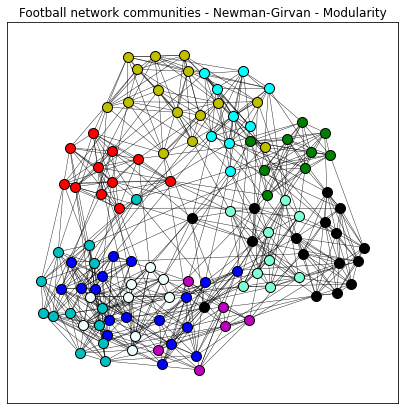

Network:		Football
Partition Type:		Newman-Girvan
Modularity:		0.5996290274077957
Performance:		0.9369946605644546
Number of Communities:	10
-----------------------------------------------------------------------


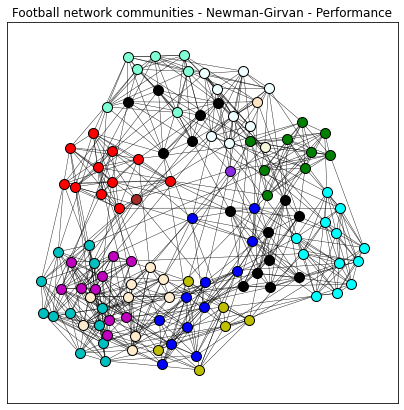

Network:		Football
Partition Type:		Newman-Girvan
Modularity:		0.5667857114344184
Performance:		0.9581998474446987
Number of Communities:	17


In [157]:
pos = nx.spring_layout(nfootball)
visualize(nfootball, football_ng_mod, 'Football', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(nfootball, football_ng_perf, 'Football', 'Newman-Girvan', 'Performance', pos)

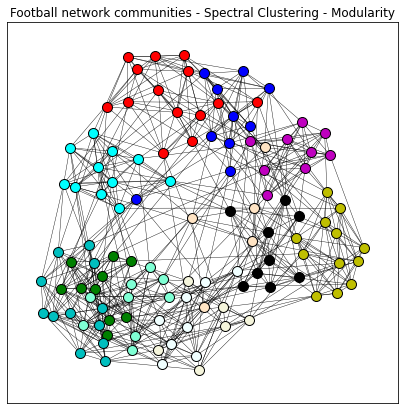

Network:		Football
Partition Type:		Spectral Clustering
Modularity:		0.6005165407471078
Performance:		0.9548436308161709
Number of Communities:	12
-----------------------------------------------------------------------


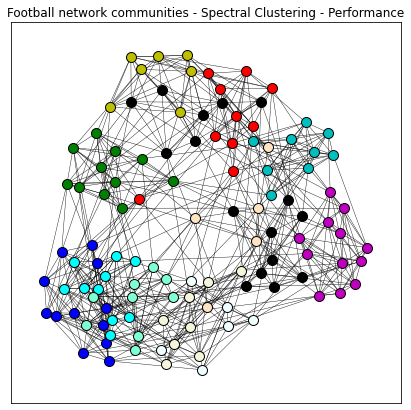

Network:		Football
Partition Type:		Spectral Clustering
Modularity:		0.5811110017058352
Performance:		0.9574370709382151
Number of Communities:	13


In [158]:
visualize(nfootball, football_sc_mod, 'Football', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(nfootball, football_sc_perf, 'Football', 'Spectral Clustering', 'Performance', pos)

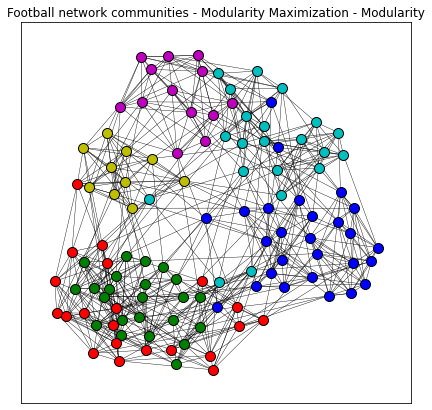

Network:		Football
Partition Type:		Modularity Maximization
Modularity:		0.5497406651426807
Performance:		0.8681922196796339
Number of Communities:	6


In [159]:
visualize(nfootball, football_mm, 'Football', 'Modularity Maximization', 'Modularity', pos)

#### Οπτικοποίηση κοινοτήτων Game of Thrones

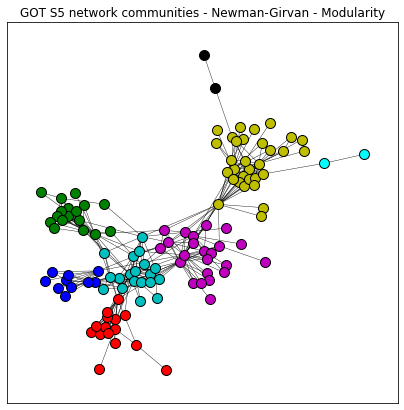

Network:		GOT S5
Partition Type:		Newman-Girvan
Modularity:		0.6681205999387817
Performance:		0.8722404215923658
Number of Communities:	8
-----------------------------------------------------------------------


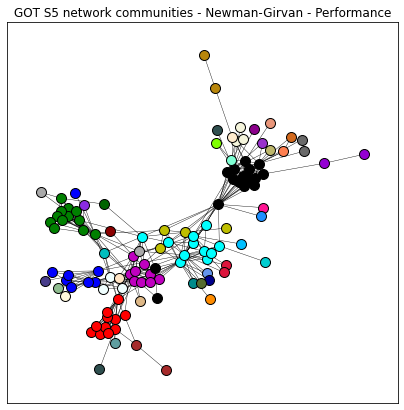

Network:		GOT S5
Partition Type:		Newman-Girvan
Modularity:		0.4838983267013573
Performance:		0.96425010682239
Number of Communities:	50


In [160]:
pos = nx.spring_layout(ngot)
visualize(ngot, got_ng_mod, 'GOT S5', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(ngot, got_ng_perf, 'GOT S5', 'Newman-Girvan', 'Performance', pos)

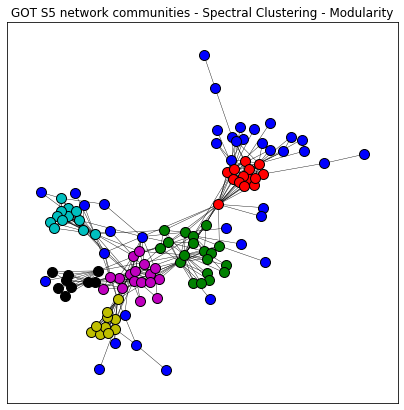

Network:		GOT S5
Partition Type:		Spectral Clustering
Modularity:		0.5629655137230895
Performance:		0.8470303375587523
Number of Communities:	7
-----------------------------------------------------------------------


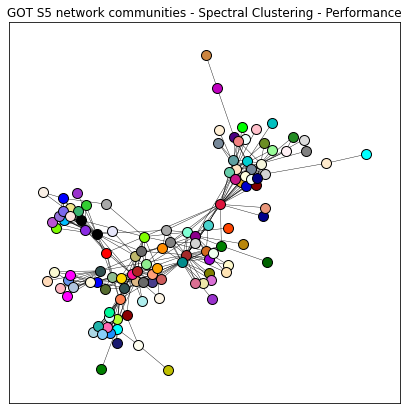

Network:		GOT S5
Partition Type:		Spectral Clustering
Modularity:		-0.014297010509131725
Performance:		0.9434553482409913
Number of Communities:	118


In [161]:
visualize(ngot, got_sc_mod, 'GOT S5', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(ngot, got_sc_perf, 'GOT S5', 'Spectral Clustering', 'Performance', pos)

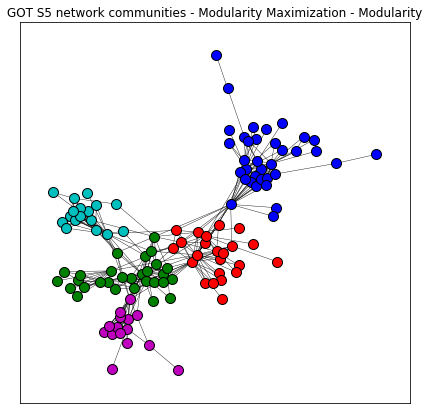

Network:		GOT S5
Partition Type:		Modularity Maximization
Modularity:		0.660477884909703
Performance:		0.829796325309785
Number of Communities:	5


In [162]:
visualize(ngot, got_mm, 'GOT S5', 'Modularity Maximization', 'Modularity', pos)

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

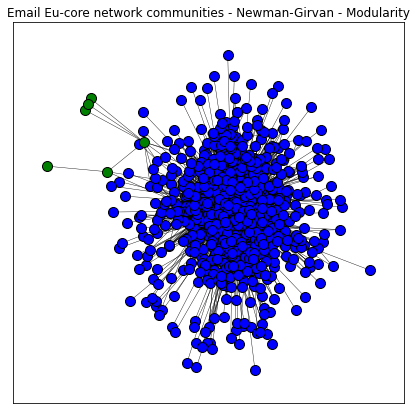

Network:		Email Eu-core
Partition Type:		Newman-Girvan
Modularity:		0.0006218821799455388
Performance:		0.04515604246249524
Number of Communities:	2
-----------------------------------------------------------------------


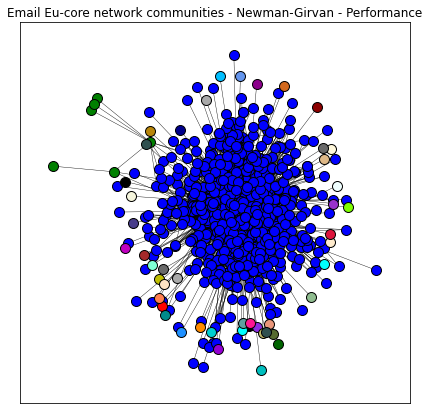

Network:		Email Eu-core
Partition Type:		Newman-Girvan
Modularity:		0.0006179294897104182
Performance:		0.13940548388093205
Number of Communities:	50


In [163]:
pos = nx.spring_layout(neu1)
visualize(neu1, eu1_ng_mod, 'Email Eu-core', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(neu1, eu1_ng_perf, 'Email Eu-core', 'Newman-Girvan', 'Performance', pos)

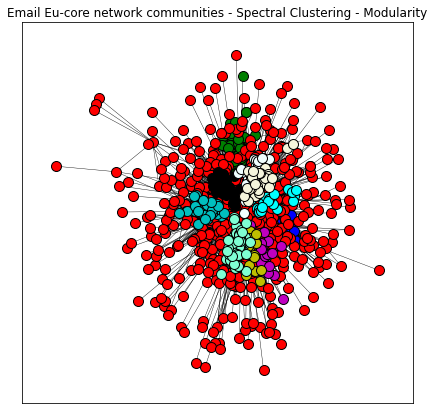

Network:		Email Eu-core
Partition Type:		Spectral Clustering
Modularity:		0.26586909024757543
Performance:		0.5318787903748932
Number of Communities:	11
-----------------------------------------------------------------------


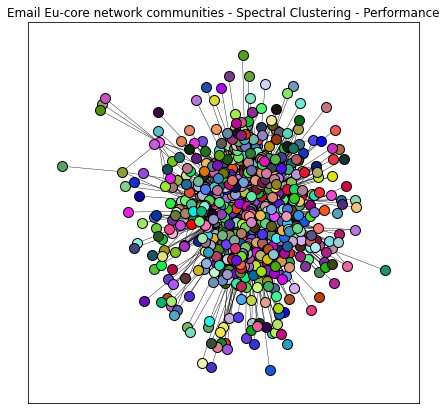

Network:		Email Eu-core
Partition Type:		Spectral Clustering
Modularity:		-0.0023237187734371336
Performance:		0.9669175564502013
Number of Communities:	985


In [164]:
visualize(neu1, eu1_sc_mod, 'Email Eu-core', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(neu1, eu1_sc_perf, 'Email Eu-core', 'Spectral Clustering', 'Performance', pos, 1)

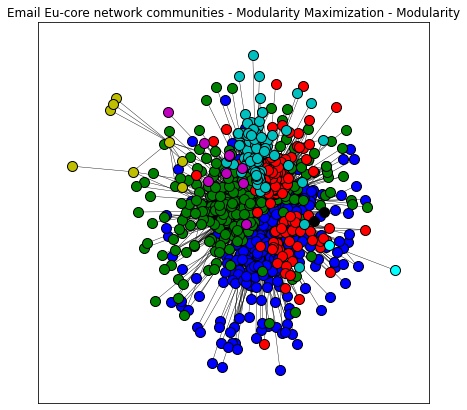

Network:		Email Eu-core
Partition Type:		Modularity Maximization
Modularity:		0.3471325650460906
Performance:		0.7078716240565892
Number of Communities:	8


In [165]:
visualize(neu1, eu1_mm, 'Email Eu-core', 'Modularity Maximization', 'Modularity', pos)

#### Σύγκριση διαμερίσεων με ground-truth για το δίκτο email Eu-core

In [166]:
f = open('email-Eu-core-department-labels.txt')
l = f.readlines()
labels = []
counter = 0
for line in l:
    if(counter == len(neu1)):
        break
    line = line.replace("\n", "")
    line = tuple(line.split(' '))
    node = int(line[0])
    if (node == list(neu1.nodes)[counter]):
        label = int(line[1])
        labels.append(label)
        counter += 1

labels_num = max(labels)
labels = np.array(labels)
print("Number of departments: " + str(labels_num+1))

ground_truth = []
ar = np.arange(0, counter)

for i in range(0, labels_num+1):
    ground_truth.append(set(ar[labels==i]))

Number of departments: 42


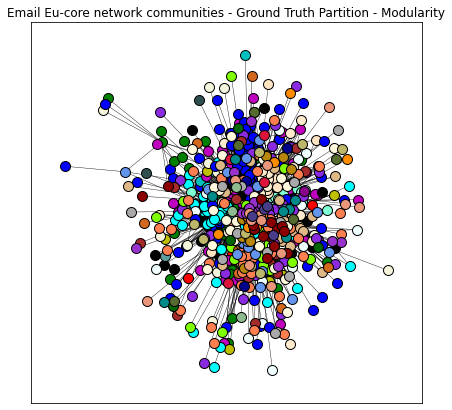

Network:		Email Eu-core
Partition Type:		Ground Truth Partition
Modularity:		0.1901020811704625
Performance:		0.936225944955262
Number of Communities:	42


In [167]:
visualize(neu1, ground_truth, 'Email Eu-core', 'Ground Truth Partition', 'Modularity', pos)

#### Οπτικοποίηση κοινοτήτων REG

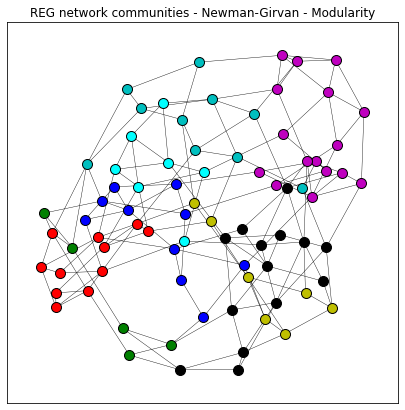

Network:		REG
Partition Type:		Newman-Girvan
Modularity:		0.5741015625
Performance:		0.8930379746835443
Number of Communities:	8
-----------------------------------------------------------------------


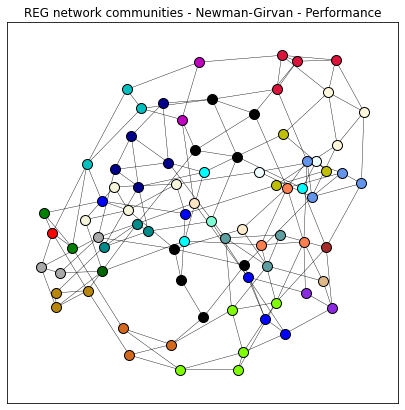

Network:		REG
Partition Type:		Newman-Girvan
Modularity:		0.4018749999999999
Performance:		0.9670886075949368
Number of Communities:	31


In [168]:
pos = nx.spring_layout(REG)
visualize(REG, REG_ng_mod, 'REG', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(REG, REG_ng_perf, 'REG', 'Newman-Girvan', 'Performance', pos)

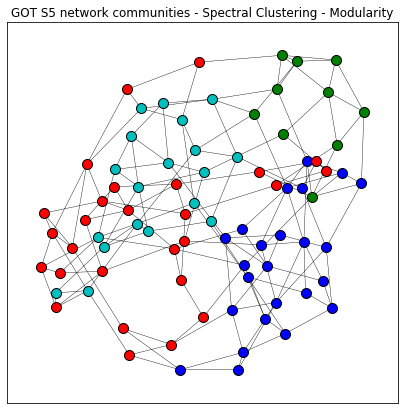

Network:		GOT S5
Partition Type:		Spectral Clustering
Modularity:		0.49199218749999996
Performance:		0.7598101265822785
Number of Communities:	4
-----------------------------------------------------------------------


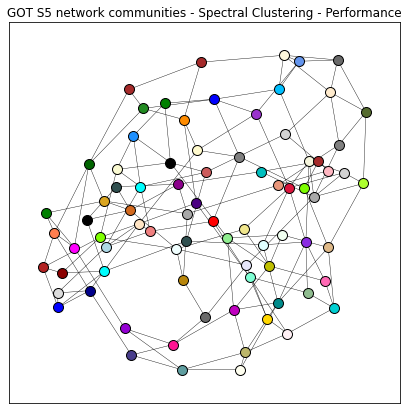

Network:		GOT S5
Partition Type:		Spectral Clustering
Modularity:		-0.00740234375
Performance:		0.9490506329113924
Number of Communities:	78


In [169]:
visualize(REG, REG_sc_mod, 'GOT S5', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(REG, REG_sc_perf, 'GOT S5', 'Spectral Clustering', 'Performance', pos)

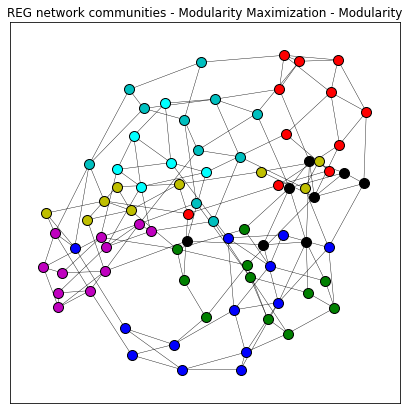

Network:		REG
Partition Type:		Modularity Maximization
Modularity:		0.563203125
Performance:		0.9003164556962026
Number of Communities:	8


In [170]:
visualize(REG, REG_mm, 'REG', 'Modularity Maximization', 'Modularity', pos)

Παρατηρούμε πως για το REG ο διαχωρισμός των κοινοτήτων δίνει καλές επιδόσεις, ειδικά με την άπληστη μέθοδο Modularity Maximization. Σε γενικές γραμμές, όλοι οι αλγόριθμοι είχαν καλές επιδόσεις, γεγονός που εξηγείται από την σταθερή διάταξη και γεωγραφία του γραφήματος. Αξίζει να σημειώσουμε πως η μέθοδος NG και SC για μεγαλύτερο perfomance, μπορεί να δίνουν πολύ καλό performance score αλλά σημαντικά χαμηλό modularity και επομένως δεν φαίνεται οπτικά να είναι αποτελεσματικοί.

#### Οπτικοποίηση κοινοτήτων RGER

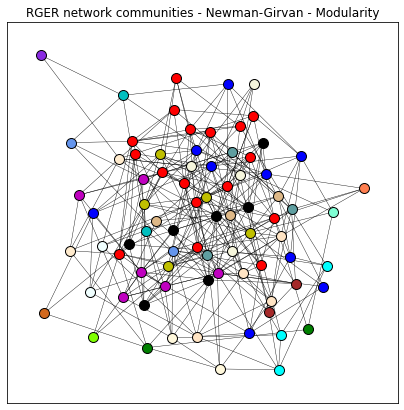

Network:		RGER
Partition Type:		Newman-Girvan
Modularity:		0.21109444444444445
Performance:		0.8949367088607595
Number of Communities:	24
-----------------------------------------------------------------------


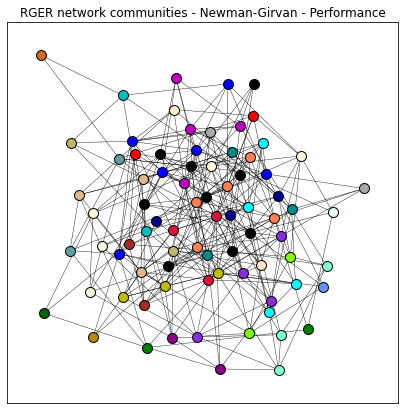

Network:		RGER
Partition Type:		Newman-Girvan
Modularity:		0.1681
Performance:		0.9215189873417722
Number of Communities:	34


In [171]:
pos = nx.spring_layout(RGER)
visualize(RGER, RGER_ng_mod, 'RGER', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(RGER, RGER_ng_perf, 'RGER', 'Newman-Girvan', 'Performance', pos)

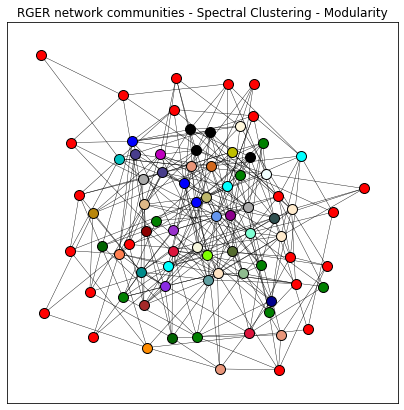

Network:		RGER
Partition Type:		Spectral Clustering
Modularity:		-0.0007222222222222206
Performance:		0.829746835443038
Number of Communities:	42
-----------------------------------------------------------------------


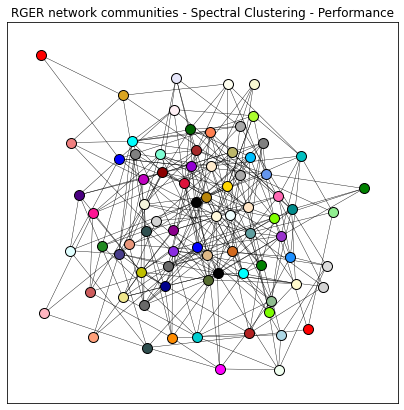

Network:		RGER
Partition Type:		Spectral Clustering
Modularity:		-0.014344444444444443
Performance:		0.904746835443038
Number of Communities:	79


In [172]:
visualize(RGER, RGER_sc_mod, 'RGER', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(RGER, RGER_sc_perf, 'RGER', 'Spectral Clustering', 'Performance', pos)

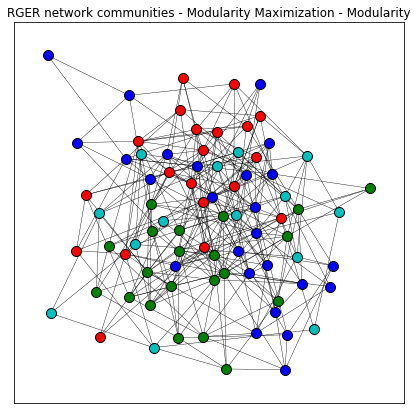

Network:		RGER
Partition Type:		Modularity Maximization
Modularity:		0.28364999999999996
Performance:		0.7591772151898735
Number of Communities:	4


In [173]:
visualize(RGER, RGER_mm, 'RGER', 'Modularity Maximization', 'Modularity', pos)

Παρατηρούμε πως για το RGER, καμία από τις 3 μεθόδους δεν δίνει καλή απόδοση, ειδικά οπτικά. Αυτό μπορούμε να το ερμηνεύσουμε μέσω τον τρόπο που συνδέονται οι κόμβοι. Πιο συγκεκριμένα, οι κόμβοι συνδέονται με τελείως τυχαίο τρόπο με αποτέλεσμα να καθίσταται πολύ μικρή η πιθανότητα εύρεσης διακριτών κοινοτήτων στην συγκεκριμένη τοπολογία. Αξίζει, ωστόσο, να σημειωθεί πως η άπληστη μέθοδος δίνει το πιο ικανοποιητικό και ανεκτό αποτέλεσμα σε σχέση με τις προηγούμενες.

#### Οπτικοποίηση κοινοτήτων RGG

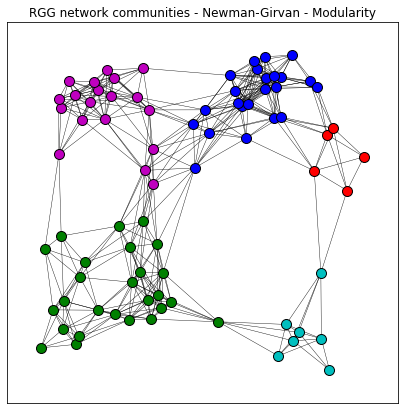

Network:		RGG
Partition Type:		Newman-Girvan
Modularity:		0.5970493827160495
Performance:		0.8639240506329114
Number of Communities:	5
-----------------------------------------------------------------------


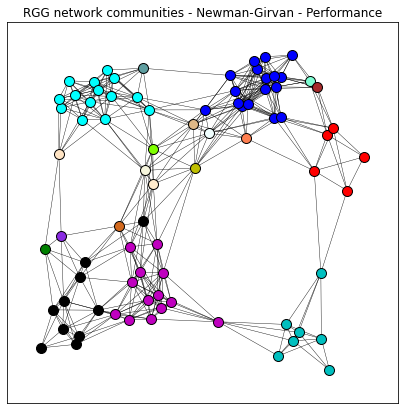

Network:		RGG
Partition Type:		Newman-Girvan
Modularity:		0.4893530864197531
Performance:		0.9291139240506329
Number of Communities:	22


In [174]:
pos = nx.spring_layout(RGG)
visualize(RGG, RGG_ng_mod, 'RGG', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(RGG, RGG_ng_perf, 'RGG', 'Newman-Girvan', 'Performance', pos)

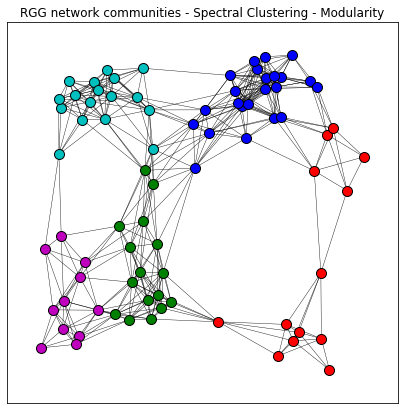

Network:		RGG
Partition Type:		Spectral Clustering
Modularity:		0.6019851851851852
Performance:		0.8968354430379747
Number of Communities:	5
-----------------------------------------------------------------------


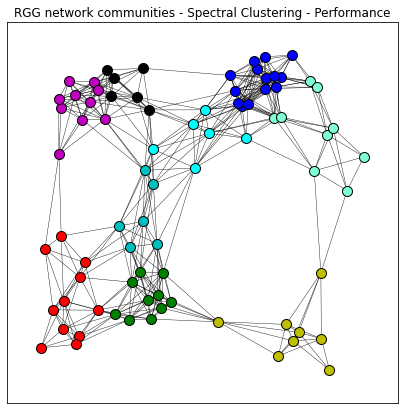

Network:		RGG
Partition Type:		Spectral Clustering
Modularity:		0.5146987654320989
Performance:		0.9338607594936709
Number of Communities:	9


In [175]:
visualize(RGG, RGG_sc_mod, 'RGG', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(RGG, RGG_sc_perf, 'RGG', 'Spectral Clustering', 'Performance', pos)

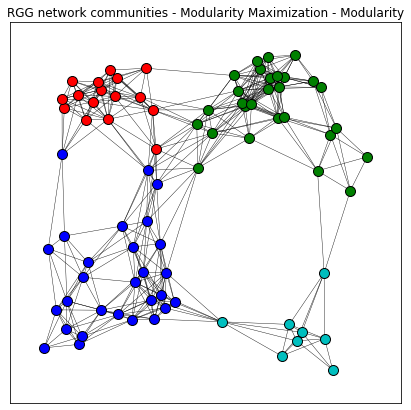

Network:		RGG
Partition Type:		Modularity Maximization
Modularity:		0.5853728395061728
Performance:		0.8291139240506329
Number of Communities:	4


In [176]:
visualize(RGG, RGG_mm, 'RGG', 'Modularity Maximization', 'Modularity', pos)

Για την σύνθετη τοπολογία RGG παρατηρούμε πως οι επιδόσεις είναι αρκετά ικανοποιητικές. Οπτικά, όλες οι μέθοδοι φαίνεται να έχουν καλά αποτελέσματα. Για την καλή επίδοση των διαχωρισμό σε κοινότητες οφείλεται ο τρόπος κατασκευής του γράφου. Πιο συγκεκριμένα, τοποθετούνται οι κόμβοι τυχαία στον χώρο και έπειτα συνδέονται με βάση της απόστασή τους από τους υπόλοιπους βάση της παραμέτρου ακτίνας R. Επομένως, οι κόμβοι που βρίσκονται χωρικά κοντά μεταξύ τους αποτελούν μία διακριτή κοινότητα.

#### Οπτικοποίηση κοινοτήτων SW

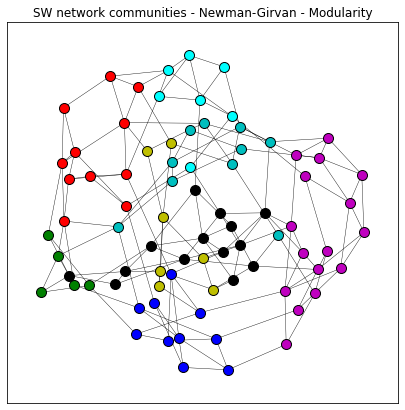

Network:		SW
Partition Type:		Newman-Girvan
Modularity:		0.5741015625
Performance:		0.8930379746835443
Number of Communities:	8
-----------------------------------------------------------------------


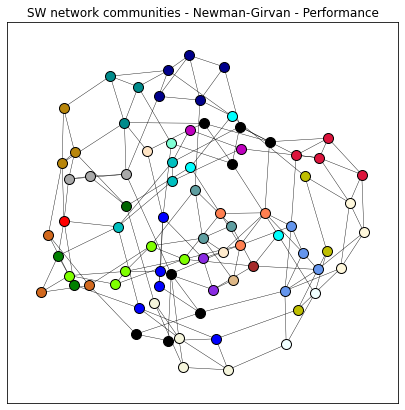

Network:		SW
Partition Type:		Newman-Girvan
Modularity:		0.4018749999999999
Performance:		0.9670886075949368
Number of Communities:	31


In [177]:
pos = nx.spring_layout(SW)
visualize(SW, SW_ng_mod, 'SW', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(SW, SW_ng_perf, 'SW', 'Newman-Girvan', 'Performance', pos)

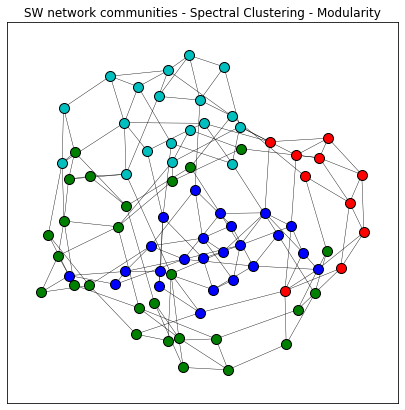

Network:		SW
Partition Type:		Spectral Clustering
Modularity:		0.49199218750000007
Performance:		0.7598101265822785
Number of Communities:	4
-----------------------------------------------------------------------


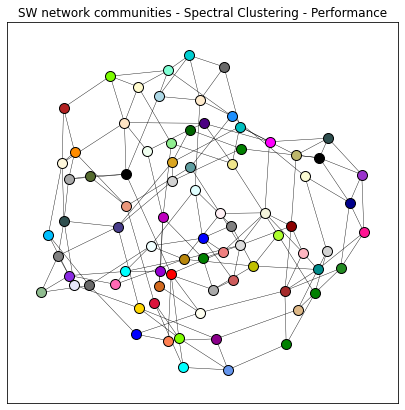

Network:		SW
Partition Type:		Spectral Clustering
Modularity:		-0.00740234375
Performance:		0.9490506329113924
Number of Communities:	78


In [178]:
visualize(SW, SW_sc_mod, 'SW', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(SW, SW_sc_perf, 'SW', 'Spectral Clustering', 'Performance', pos)

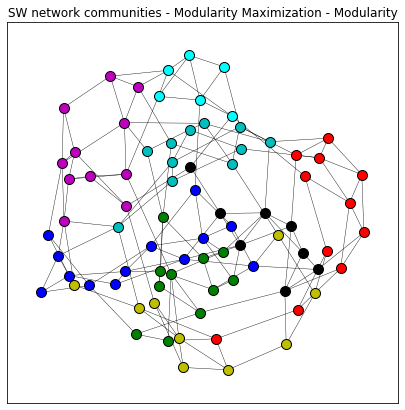

Network:		SW
Partition Type:		Modularity Maximization
Modularity:		0.563203125
Performance:		0.9003164556962026
Number of Communities:	8


In [179]:
visualize(SW, SW_mm, 'SW', 'Modularity Maximization', 'Modularity', pos)

Παρατηρούμε και στο SW, πως η επίδοση του Spectral Clustering υπερτερεί σε σχέση με τις άλλες 2 μεθόδους. Επίσης, για τα partitions με το μεγαλύτερο performace παρατηρούμε πως το modularity score είναι σημαντικά μικρό και ο αριθμός των κοινοτήτων τείνει στον αριθμό των κόμβων του δικτύου. Για τα υπόλοιπα partitions, ωστόσο, οι κοινότητες είναι οπτικά ορατές. Σε ένα δίκτυο small-world περιμένουμε να σχηματιστούν κοινότητες γύρω από τους nodes hubs (μεγάλου βαθμού κόμβοι), όπως και παρατηρούμε οπτικά. 

#### Οπτικοποίηση κοινοτήτων SF

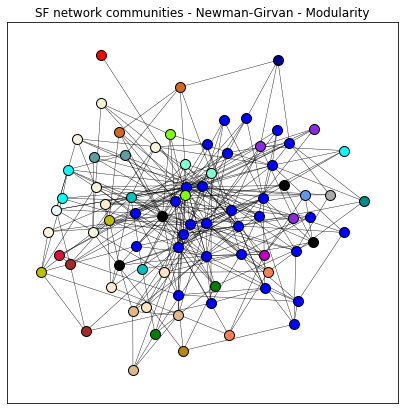

Network:		SF
Partition Type:		Newman-Girvan
Modularity:		0.13638331024930742
Performance:		0.8468354430379746
Number of Communities:	30
-----------------------------------------------------------------------


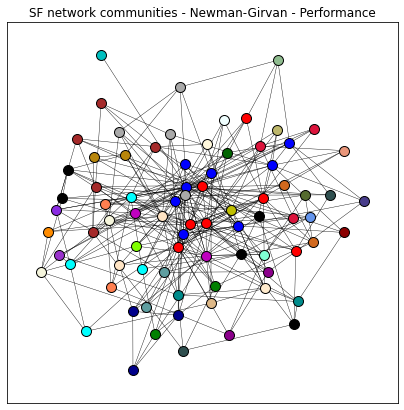

Network:		SF
Partition Type:		Newman-Girvan
Modularity:		0.11511534799168983
Performance:		0.9174050632911392
Number of Communities:	43


In [180]:
pos = nx.spring_layout(SF)
visualize(SF, SF_ng_mod, 'SF', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(SF, SF_ng_perf, 'SF', 'Newman-Girvan', 'Performance', pos)

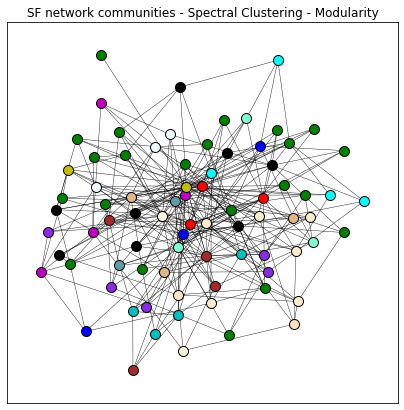

Network:		SF
Partition Type:		Spectral Clustering
Modularity:		-0.018833318905817176
Performance:		0.8161392405063291
Number of Communities:	19
-----------------------------------------------------------------------


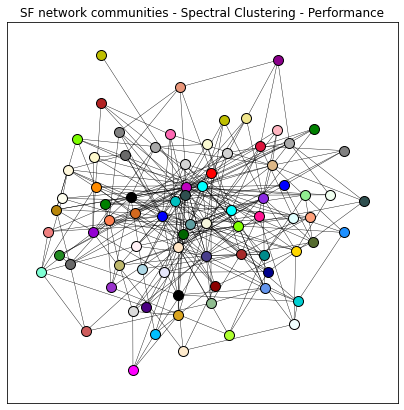

Network:		SF
Partition Type:		Spectral Clustering
Modularity:		-0.019747662742382266
Performance:		0.9034810126582279
Number of Communities:	79


In [181]:
visualize(SF, SF_sc_mod, 'SF', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------------')
visualize(SF, SF_sc_perf, 'SF', 'Spectral Clustering', 'Performance', pos)

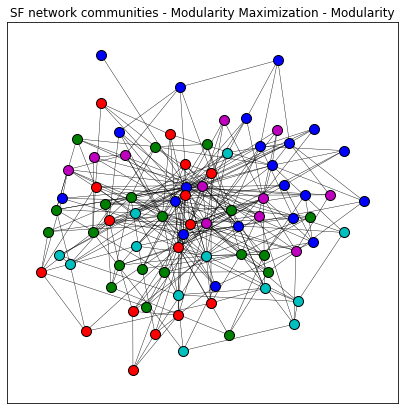

Network:		SF
Partition Type:		Modularity Maximization
Modularity:		0.27000194771468145
Performance:		0.7939873417721519
Number of Communities:	5


In [182]:
visualize(SF, SF_mm, 'SF', 'Modularity Maximization', 'Modularity', pos)

Σε ένα scale-free δίκτυο περιμένουμε να σχηματιστούν κοινότητας γύρω από τους κόμβους μεγάλου βαθμού, όπως στην περίπτωση του SW. Ωστόσο, παρατηρούμε πως οι επιδόσεις και των 3 μεθόδων είναι χαμηλές σε σχέση με αυτές των προηγούμενων συνθετικών τοπολογιών, κυρίως λόγω του χαμηλού modularity score. Στις 2 πρώτες μεθόδους, πιο συγκεκριμένα, είχαμε ως αποτέλεσμα αρκετά μεγάλο αριθμό κοινοτήτων, ενώ με την μέθοδο του Modularity Maximazation είχαμε συνολικό αριθμό κοινοτήτων 5, που είναι κοντά στην παράμετρο m=4 (το πλήθος των ακμών σύνδεσης του καινούργιου κόμβου με παλιούς, κατά προτίμηση αυτούς με τον μεγαλύτερο βαθμό) της συνάρτησης κατασκευής του SF δικτύου. Δηλαδή μπορούμε να υποθέσουμε πως έχουμε περίπου 4 μεγάλα hubs και άρα 4 μεγάλες κοινότητες.

#### Σύγκριση χρόνων αλγορίθμων

In [208]:
for timestamp in timestamps:
    timestamps[timestamp] = round(timestamps[timestamp], 1)
    print(timestamp + ':' + str(timestamps[timestamp]) + '\tsec')

football_ng	:6	sec
got_ng		:2	sec
eu1_ng		:385	sec
football_sc	:52	sec
got_sc		:52	sec
eu1_sc		:11628	sec
football_mm	:0	sec
got_mm		:0	sec
eu1_mm		:3	sec


In [239]:
#final data report tables

networks = ['Football', 'GOT S5', 'Email Eu']

algorithms = ['NG-mod', 'NG-perf', 'SC-mod', 'SC-perf', 'MM']

football_parts = [football_ng_mod, football_ng_perf, football_sc_mod, football_sc_perf, football_mm]
got_parts = [got_ng_mod, got_ng_perf, got_sc_mod, got_sc_perf, got_mm]
eu1_parts = [eu1_ng_mod, eu1_ng_perf, eu1_sc_mod, eu1_sc_perf, eu1_mm]

football_mod = []
football_perf = []
football_comm = []
got_mod = []
got_perf = []
got_comm = []
eu1_mod = []
eu1_perf = []
eu1_comm = []

football_avg = []
got_avg = []
eu1_avg = []

for i in range(0,5):
    football_mod.append("{:.2f}".format(cmt.modularity(nfootball, football_parts[i])))
    football_perf.append("{:.2f}".format(cmt.partition_quality(nfootball, football_parts[i])[1]))
    football_comm.append(len(football_parts[i]))
    football_avg.append((float(football_perf[i])+ float(football_mod[i]))/2)
    got_mod.append("{:.2f}".format(cmt.modularity(ngot, got_parts[i])))
    got_perf.append("{:.2f}".format(cmt.partition_quality(ngot, got_parts[i])[1]))
    got_comm.append(len(got_parts[i]))
    got_avg.append((float(got_perf[i])+ float(got_mod[i]))/2)
    eu1_mod.append("{:.4f}".format(cmt.modularity(neu1, eu1_parts[i])))
    eu1_perf.append("{:.2f}".format(cmt.partition_quality(neu1, eu1_parts[i])[1]))
    eu1_avg.append((float(eu1_perf[i])+ float(eu1_mod[i]))/2)
    eu1_comm.append(len(eu1_parts[i]))
    
football_data = {"Algorithm":algorithms,
                "#Communities":football_comm,
                "Modularity":football_mod,
                "Performance":football_perf,
                "Average":football_avg, 
                "Time":[timestamps['football_ng\t'], timestamps['football_ng\t'], timestamps['football_sc\t'], 
                        timestamps['football_sc\t'], timestamps['football_mm\t']]}
football_table = pd.DataFrame(football_data)

got_data = {"Algorithm":algorithms,
            "#Communities":got_comm,
            "Modularity":got_mod,
            "Performance":got_perf,
            "Average":got_avg,
            "Time":[timestamps['got_ng\t\t'], timestamps['got_ng\t\t'], timestamps['got_sc\t\t'], 
                        timestamps['got_sc\t\t'], timestamps['got_mm\t\t']]}
got_table = pd.DataFrame(got_data)

eu1_data = {"Algorithm":algorithms,
            "#Communities":eu1_comm,
            "Modularity":eu1_mod,
            "Performance":eu1_perf,
            "Average":eu1_avg,
            "Time":[timestamps['eu1_ng\t\t'], timestamps['eu1_ng\t\t'], timestamps['eu1_sc\t\t'], 
                        timestamps['eu1_sc\t\t'], timestamps['eu1_mm\t\t']]}
eu1_table = pd.DataFrame(eu1_data)
print('FINAL REPORT - PARTITION ALGORITHMS PERFORMANCE\n')
print('----------------------------------------------------------------')
print('Football Network \t Number of real communities: ?')
print('\n')
print(football_table)
print('----------------------------------------------------------------')
print('GOT S5 Network \t\t Number of real communities: 6')
print('\n')
print(got_table)
print('----------------------------------------------------------------')
print('Email EU-core Network \t Number of real communities: 42\n')
print('Ground Truth  Modularity:\t' + str("{:.2f}".format((cmt.modularity(neu1, ground_truth)))))
print('Ground Truth Performance:\t' + str("{:.2f}".format(cmt.partition_quality(neu1, ground_truth)[1])))
print('Ground Truth     Average:\t' + str("{:.2f}".format((cmt.modularity(neu1, ground_truth)+
                                                           cmt.partition_quality(neu1, ground_truth)[1])/2)))
print('\n')
print(eu1_table)

FINAL REPORT - PARTITION ALGORITHMS PERFORMANCE

----------------------------------------------------------------
Football Network 	 Number of real communities: ?


  Algorithm  #Communities Modularity Performance  Average  Time
0    NG-mod            10       0.60        0.94    0.770     6
1   NG-perf            17       0.57        0.96    0.765     6
2    SC-mod            12       0.60        0.95    0.775    52
3   SC-perf            13       0.58        0.96    0.770    52
4        MM             6       0.55        0.87    0.710     0
----------------------------------------------------------------
GOT S5 Network 		 Number of real communities: 6


  Algorithm  #Communities Modularity Performance  Average  Time
0    NG-mod             8       0.67        0.87    0.770     2
1   NG-perf            50       0.48        0.96    0.720     2
2    SC-mod             7       0.56        0.85    0.705    52
3   SC-perf           118      -0.01        0.94    0.465    52
4        MM     

- Παρατηρούμε πως χρονικά την καλύτερη επίδοση με φθίνουσα σειρά έχει πρώτα η μέθοδος Modularity Maximazation, Newman-Girvan και τέλος Spectral Clustering. 
- To μέσο σκορ, δηλαδή το average = (modularity+performance)/2 για το δίκτυο football είναι ψηλότερο στην spectral-clustering μέθοδο με πολύ μικρή διαφορά από την Newman-Girvan (διαφορά -0.005). Για τα υπόλοιπα 2 δίκτυα got και email eu το μεγαλύτερο μέσο σκορ το πέτυχε η τελευταία μέθοδος. 
- Για το got δίκτυο παρατηρούμε πως το πλήθος των κοινοτήτων που είναι πιο κοντά στο πραγματικό είναι αποτέλεσμα της μεθόδου Spectral-Clustering Max Modularity και της Modularity Maximazation. Λαμβάνοντας υπόψη το μέσο σκορ και τον χρόνο εκτέλεσης, η 3η μέθοδος είναι προφανώς η νικήτρια.
- Για το email eu δίκτυο ο αριθμός των πραγματικών (ground-truth) κοινοτήτων είναι 42 και ενώ η 3η μέθοδος πέτυχε το υψηλότερο μέσο σκορ από τις υπόλοιπες 2 μεθόδους, βρήκε μόνο 8 κοινότητες. Ωστόσο δεν υπήρξε μεγάλη διαφορά στον αριθμό κοινοτήτων που βρήκε η 2η μέθοδος (μόνο 11). Πιο κοντά στο πραγματικό πλήθος κοινοτήτων βρέθηκε η 1η μέθοδος με 50 κοινότητες. Ωστόσο το μέσο σκορ της είναι σημαντικά χαμηλό (μόλις 0.07 σε σχέση με το ground-truth average 0.56). Οπότε η διαμέριση φαίνεται να απέχει πολύ από την πραγματική παρά το κοντινό στο πραγματικό πλήθος κοινοτήτων.

Συγκρίνοντας όλα τα αποτελέσματα σε συνδυασμό με τα οπτικά, η καλύτερη μέθοδος με διαφορά είναι η άπληστη Modularity Maximazation. Χρονικά είναι πολύ αποδοτικότερη και τις περισσότερες φορές έχει πολύ υψηλό μέσο σκορ.